### In this part, I am going to build a product recommendation system on the same Online Retail Data. I will be using two approaches of Collaborative Filtering, i.e., User-based and Item-based filtering.

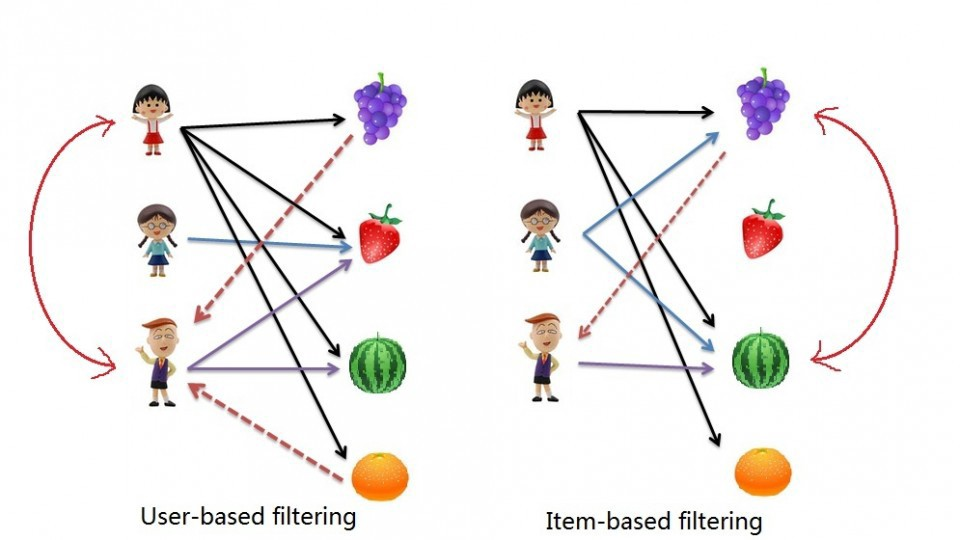

In [16]:
# Importing Modules
import pandas as pd
import numpy as np

#cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Loading dataset
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Data Preparation

In [3]:
# Filtering the data fror Quantity greater than 0
df = df.query("Quantity > 0")

#### Handling NaN values

In [5]:
df.CustomerID.isna().sum() # Checking the null values in CustomerID column

133361

In [6]:
# Dropping the above null values
df = df.dropna(subset=['CustomerID'])

In [7]:
df.shape

(397924, 8)

#### Building a User - Item Matrix
In order to build a product recommendation system with a collaborative filtering algorithm,
we need to have data where each record contains information on which item each customer
has bought.

In [9]:
user_item_matrix = df.pivot_table(
        index = 'CustomerID',
        columns = 'StockCode',
        values = 'Quantity',
        aggfunc = 'sum'
)

user_item_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [14]:
# Encoding this data in form of 0-1, where 0 - product never purchased, 1 - product was purchased
user_item_matrix = user_item_matrix.applymap(lambda x: 1 if x > 0 else 0)

In [15]:
user_item_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Collaborative Filtering
We are going to explore two approaches to building a product recommender engine—user-based versus item-based. In the user-based approach, we compute similarities between users based on their item purchase history. In the item-based approach, on the other hand, we compute similarities between items based on which items are often bought together with which other items.

To measure the similarity between users or between items, we are going to use the cosine_similarity method in the scikit-learn package

In [18]:
user_user_sim_matrix = pd.DataFrame(cosine_similarity(user_item_matrix))
user_user_sim_matrix.columns = user_item_matrix.index
user_user_sim_matrix['CustomerID'] = user_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')

In [19]:
user_user_sim_matrix.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000
